In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
sba_loans = pd.read_csv('SBAnational.csv')
sba_loans

/var/folders/pk/ntjyb03d4djbyplk8mmb55jc0000gn/T/ipykernel_52517/926704124.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba_loans = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


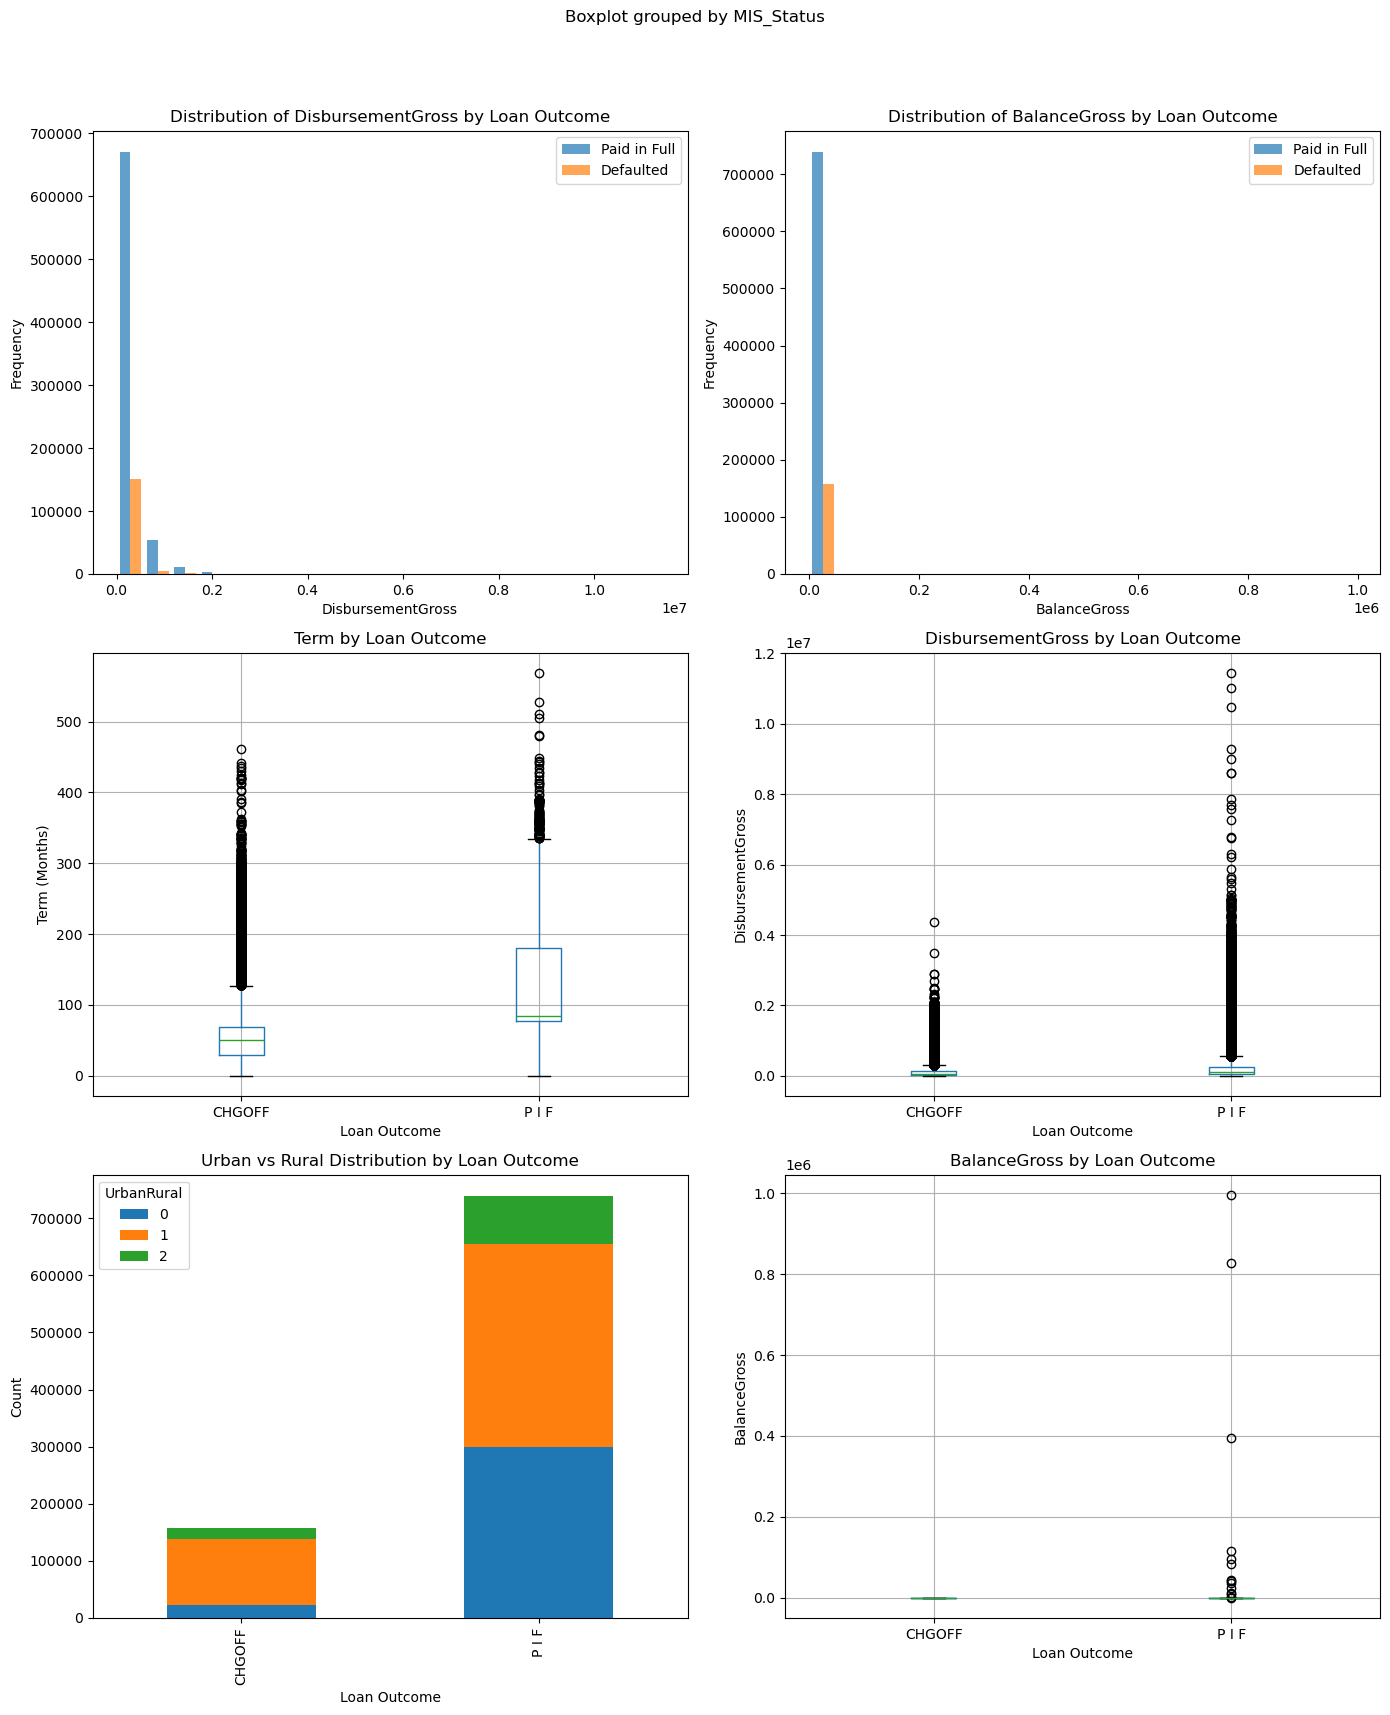

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming CSV format, adjust as necessary)
# sba_loans = pd.read_csv('path_to_your_dataset.csv')

# Convert necessary columns to appropriate types
sba_loans['DisbursementGross'] = sba_loans['DisbursementGross'].replace('[\$,]', '', regex=True).astype(float)
sba_loans['BalanceGross'] = sba_loans['BalanceGross'].replace('[\$,]', '', regex=True).astype(float)
sba_loans['SBA_Appv'] = sba_loans['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)
sba_loans['GrAppv'] = sba_loans['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

# Convert `MIS_Status` to a binary variable for easier filtering
sba_loans['MIS_Status_Binary'] = sba_loans['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

# Plotting the specified histograms and box plots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Histogram for DisbursementGross
axes[0, 0].hist([sba_loans[sba_loans['MIS_Status'] == 'P I F']['DisbursementGross'],
                 sba_loans[sba_loans['MIS_Status'] == 'CHGOFF']['DisbursementGross']],
                bins=20, label=['Paid in Full', 'Defaulted'], alpha=0.7)
axes[0, 0].set_title('Distribution of DisbursementGross by Loan Outcome')
axes[0, 0].set_xlabel('DisbursementGross')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Histogram for BalanceGross
axes[0, 1].hist([sba_loans[sba_loans['MIS_Status'] == 'P I F']['BalanceGross'],
                 sba_loans[sba_loans['MIS_Status'] == 'CHGOFF']['BalanceGross']],
                bins=20, label=['Paid in Full', 'Defaulted'], alpha=0.7)
axes[0, 1].set_title('Distribution of BalanceGross by Loan Outcome')
axes[0, 1].set_xlabel('BalanceGross')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Box Plot for Term
sba_loans.boxplot(column='Term', by='MIS_Status', ax=axes[1, 0])
axes[1, 0].set_title('Term by Loan Outcome')
axes[1, 0].set_xlabel('Loan Outcome')
axes[1, 0].set_ylabel('Term (Months)')
plt.suptitle('')

# Box Plot for DisbursementGross by Loan Outcome
sba_loans.boxplot(column='DisbursementGross', by='MIS_Status', ax=axes[1, 1])
axes[1, 1].set_title('DisbursementGross by Loan Outcome')
axes[1, 1].set_xlabel('Loan Outcome')
axes[1, 1].set_ylabel('DisbursementGross')

# Bar Plot for UrbanRural distribution by MIS_Status
urban_rural_counts = sba_loans.groupby(['MIS_Status', 'UrbanRural']).size().unstack()
urban_rural_counts.plot(kind='bar', stacked=True, ax=axes[2, 0])
axes[2, 0].set_title('Urban vs Rural Distribution by Loan Outcome')
axes[2, 0].set_xlabel('Loan Outcome')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='UrbanRural')

# Box Plot for BalanceGross by Loan Outcome
sba_loans.boxplot(column='BalanceGross', by='MIS_Status', ax=axes[2, 1])
axes[2, 1].set_title('BalanceGross by Loan Outcome')
axes[2, 1].set_xlabel('Loan Outcome')
axes[2, 1].set_ylabel('BalanceGross')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1. Graph 1 and 2
- Highly Skewed Distribution: </br>
Both DisbursementGross and BalanceGross show a significant skew towards lower loan amounts, with most loans concentrated on the lower end of the scale. </br>
There are very few high-value loans, which are likely outliers in the dataset. </br>

- Higher Defaults at Lower Loan Amounts: </br>
There is a noticeable number of defaults within the lower loan amount ranges, though the frequency is much lower than the loans that were paid in full. </br>
This suggests that smaller loan amounts might be more prone to default, which could be due to the borrowers’ limited ability to generate sufficient cash flow to cover the loans. </br>

- Paid in Full Dominates: </br>
The frequency of loans that were paid in full vastly outnumbers those that defaulted across all loan amounts.
This indicates that defaults are relatively rare in comparison to loans that are successfully repaid. </br>

- Loan Amounts and Default Rates: </br>
The plot suggests that the size of the loan does not have a straightforward relationship with the default probability; however, lower-value loans do experience more defaults in absolute terms. </br>


2. Graph 3 and 4
- Loan Term (Duration) by Loan Outcome: </br>
The median loan term for loans that defaulted (CHGOFF) is relatively shorter compared to loans that were fully paid (PIF). </br>
Loans that were fully paid in full (PIF) have a wider range in terms, with more extended periods, including several loans going beyond 200 and even 400 months. </br>
There is a significant concentration of shorter-term loans (under 100 months) in both categories, but defaults are more prevalent in loans with shorter terms. </br>
This may suggest that shorter-term loans could be more prone to default, possibly because they might be higher-risk loans requiring shorter repayment periods or because they pose repayment challenges for borrowers. </br>

- Disbursement Amount by Loan Outcome: </br>
The distribution of DisbursementGross (loan amounts disbursed) is skewed towards lower amounts for both defaulted and fully paid loans. </br>
The median disbursement amount for loans that defaulted is slightly lower than that of loans that were paid in full, but there is considerable overlap. </br>
Outliers exist for both paid and defaulted loans at higher disbursement levels, but they appear more frequently in the PIF category, suggesting that larger loans tend to have a higher likelihood of repayment success. </br>
The higher concentration of smaller loans among defaulted loans aligns with the observation from the histograms that smaller loans might be more vulnerable to default. </br>

- Possible Interpretations: </br>
Shorter Loan Terms and Default Risk: Loans with shorter terms may be riskier, or borrowers with shorter terms may struggle more with timely repayments, leading to higher default rates. </br>
Smaller Disbursements and Default Risk: Loans with lower disbursement amounts appear more susceptible to default, perhaps indicating that smaller loans are granted to higher-risk borrowers or businesses with limited financial stability. </br>


3. Graph 5 and 6
- Urban Rural: </br>
1: Urban — indicates that the borrower is located in an urban area. </br>
2: Rural — indicates that the borrower is located in a rural area. </br>
0: Undefined — used when the data does not specify whether the location is urban or rural. </br>
This variable can help analyze whether the loan outcome differs based on the borrower's location. For example, rural businesses might face different economic conditions or access to resources than urban businesses, which could affect default rates. </br>
- Urban Concentration: The high volume of loans in urban areas might reflect the SBA's focus on supporting small businesses in these regions, which often have higher business density. This concentration could mean that urban-specific factors (e.g., competition, cost of business) may indirectly impact loan outcomes. </br>
- Lower Balance and Defaults: The low outstanding balances among defaulted loans suggest that smaller remaining amounts may be insufficient to prevent defaults if the business is struggling, while larger balances may see more proactive management from lenders. </br>

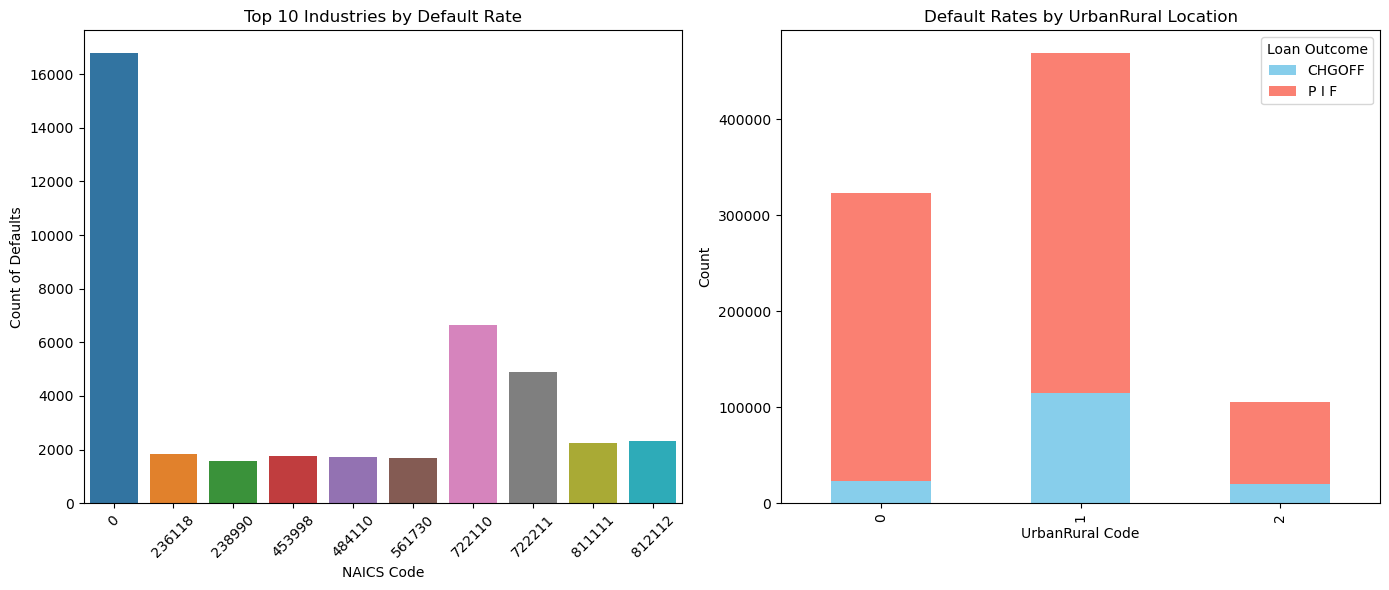

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
# Removing $ and commas, and converting currency columns to float
currency_columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
for col in currency_columns:
    sba_loans[col] = sba_loans[col].replace('[\$,]', '', regex=True).astype(float)

# Convert MIS_Status to binary (P I F -> 0, CHGOFF -> 1) for easy calculations
sba_loans['MIS_Status_Binary'] = sba_loans['MIS_Status'].map({'P I F': 0, 'CHGOFF': 1})

# Set up the figure layout for the remaining 2 graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.subplots_adjust(wspace=0.4)

# Bar Chart: Default rates by Industry (NAICS)
default_by_industry = sba_loans[sba_loans['MIS_Status'] == 'CHGOFF']['NAICS'].value_counts()
sns.barplot(x=default_by_industry.index[:10], y=default_by_industry.values[:10], ax=axes[0])
axes[0].set_title('Top 10 Industries by Default Rate')
axes[0].set_xlabel('NAICS Code')
axes[0].set_ylabel('Count of Defaults')
axes[0].tick_params(axis='x', rotation=45)

# Bar Chart: Default rates by UrbanRural
default_by_urban_rural = sba_loans.groupby(['UrbanRural', 'MIS_Status']).size().unstack().fillna(0)
default_by_urban_rural.plot(kind='bar', stacked=True, ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Default Rates by UrbanRural Location')
axes[1].set_xlabel('UrbanRural Code')
axes[1].set_ylabel('Count')
axes[1].legend(title='Loan Outcome')

plt.tight_layout()
plt.show()

1. Top 10 Industries by Default Rate
- This bar chart displays the count of defaults across the top 10 industries (identified by NAICS codes) with the highest occurrences of loan defaults.
- The industry with a NAICS code of 0 has an unusually high number of defaults compared to the other industries. This may indicate missing or incorrectly coded data, as 0 is not typically associated with a specific industry classification.
- Among the industries with valid NAICS codes, certain sectors show a higher frequency of defaults:
- - 722110 (Full-Service Restaurants) and 722211 (Limited-Service Restaurants) have relatively high counts, suggesting that the restaurant industry may face significant financial challenges impacting loan repayment.
- - 561730 (Landscaping Services), 453998 (All Other Miscellaneous Store Retailers), and 236118 (Residential Remodelers) also show notable default counts, which could indicate risks associated with these business types.
- Insight: The concentration of defaults in specific industries may suggest that these sectors are more financially vulnerable, perhaps due to their reliance on consumer spending, high competition, or susceptibility to economic downturns. Targeting these industries with more stringent loan approval criteria or tailored support might reduce default rates.

2. Default Rates by UrbanRural Location (Right Chart)
- This stacked bar chart illustrates the distribution of loan outcomes (Paid in Full - P I F, and Charged Off - CHGOFF) across three location types: 0 (Undefined), 1 (Urban), and 2 (Rural).
- Urban Locations (Code 1):
- - Urban areas show a significantly higher total number of loans than rural areas, with both paid-in-full and defaulted loans well represented.
- - Although the default count is higher in urban areas than rural, this is expected given the larger volume of loans issued in urban settings.
- Rural Locations (Code 2):
Rural locations have a much smaller total loan volume, with fewer defaults in absolute terms. However, the proportion of defaults to repaid loans could be comparable to urban settings, though this isn't directly visible in this chart.
- Insight: Urban areas have a higher number of loans, and naturally, a higher absolute count of defaults. However, this doesn't necessarily indicate that urban loans are inherently riskier—rather, it reflects the higher loan activity in these regions. Further analysis could determine if the proportion of defaults is actually higher in urban areas compared to rural areas, or if the volume difference accounts for most of the observed pattern.

In [5]:
sba_loans

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,0.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0,0.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,70000.0,0.0,P I F,0.0,70000.0,56000.0,0.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,85000.0,0.0,P I F,0.0,85000.0,42500.0,0.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,300000.0,0.0,P I F,0.0,300000.0,225000.0,0.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1.0


In [6]:
# Display general information about the dataset, including data types and non-null counts
print("Dataset Information:")
sba_loans.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-

In [7]:
# Display descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
sba_loans.describe()


Descriptive Statistics for Numeric Columns:


,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05,897167.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05,0.175617
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05,0.380494
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04,0.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05,0.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,1.000000


In [8]:
# Display the count of missing values in each column
print("\nMissing Values in Each Column:")
sba_loans.isnull().sum()


Missing Values in Each Column:


LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
MIS_Status_Binary      1997
dtype: int64

/var/folders/pk/ntjyb03d4djbyplk8mmb55jc0000gn/T/ipykernel_52517/2434933655.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sba_loans['ApprovalDate'] = pd.to_datetime(sba_loans['ApprovalDate'], errors='coerce')


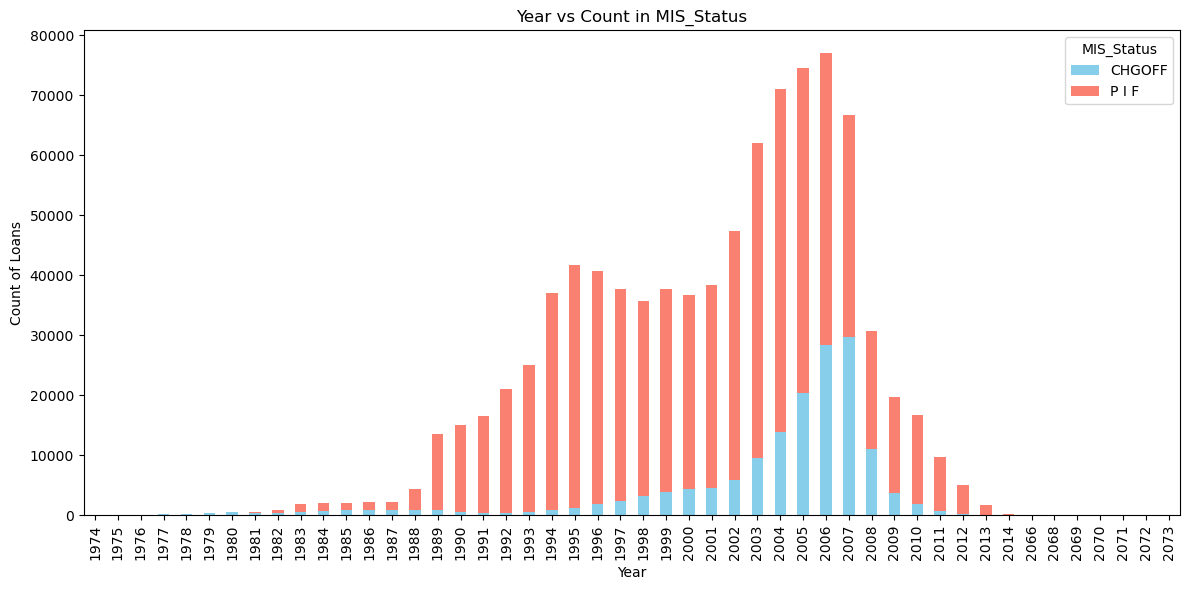

In [9]:
# Extract year from the 'ApprovalDate' or use 'ApprovalFY' if available
# Assuming 'ApprovalDate' is in datetime format, or needs to be converted
if 'ApprovalDate' in sba_loans.columns:
    sba_loans['ApprovalDate'] = pd.to_datetime(sba_loans['ApprovalDate'], errors='coerce')
    sba_loans['Year'] = sba_loans['ApprovalDate'].dt.year
elif 'ApprovalFY' in sba_loans.columns:
    sba_loans['Year'] = sba_loans['ApprovalFY']
else:
    print("Year information not found.")
    sba_loans['Year'] = None  # Placeholder if neither column is available

# Group by 'Year' and 'MIS_Status' to get the count of each status per year
yearly_status_counts = sba_loans.groupby(['Year', 'MIS_Status']).size().unstack().fillna(0)

# Plotting the bar graph
yearly_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Year vs Count in MIS_Status')
plt.xlabel('Year')
plt.ylabel('Count of Loans')
plt.legend(title='MIS_Status')
plt.tight_layout()
plt.show()

In [10]:
# Extract year from the 'ApprovalDate' or use 'ApprovalFY' if available
# Assuming 'ApprovalDate' is in datetime format, or needs to be converted
if 'ApprovalDate' in sba_loans.columns:
    sba_loans['ApprovalDate'] = pd.to_datetime(sba_loans['ApprovalDate'], errors='coerce')
    sba_loans['Year'] = sba_loans['ApprovalDate'].dt.year
elif 'ApprovalFY' in sba_loans.columns:
    sba_loans['Year'] = sba_loans['ApprovalFY']
else:
    print("Year information not found.")
    sba_loans['Year'] = None  # Placeholder if neither column is available

# Group by 'Year' and 'MIS_Status' to get the count of each status per year
yearly_status_counts = sba_loans.groupby(['Year', 'MIS_Status']).size().unstack().fillna(0)

# Display the table of yearly counts
yearly_status_counts.reset_index(inplace=True)  # Reset index for a cleaner table view
print("\nYearly Count of MIS_Status:")
print(yearly_status_counts)


Yearly Count of MIS_Status:
MIS_Status  Year   CHGOFF    P I F
0           1974     29.0      3.0
1           1975     47.0      1.0
2           1976     80.0      7.0
3           1977    129.0     11.0
4           1978    258.0     10.0
5           1979    339.0     17.0
6           1980    525.0     21.0
7           1981    340.0    238.0
8           1982    345.0    507.0
9           1983    576.0   1269.0
10          1984    738.0   1252.0
11          1985    833.0   1146.0
12          1986    898.0   1300.0
13          1987    945.0   1194.0
14          1988    935.0   3398.0
15          1989    838.0  12733.0
16          1990    597.0  14403.0
17          1991    433.0  16046.0
18          1992    429.0  20682.0
19          1993    490.0  24536.0
20          1994    863.0  36144.0
21          1995   1261.0  40511.0
22          1996   1803.0  38961.0
23          1997   2444.0  35275.0
24          1998   3124.0  32649.0
25          1999   3855.0  33823.0
26          2000   4304.0 

In [11]:
# Extract year from 'ApprovalDate' or use 'ApprovalFY' if available
if 'ApprovalDate' in sba_loans.columns:
    sba_loans['ApprovalDate'] = pd.to_datetime(sba_loans['ApprovalDate'], errors='coerce')
    sba_loans['DisbursementDate'] = pd.to_datetime(sba_loans['DisbursementDate'], errors='coerce')
    sba_loans['Year'] = sba_loans['ApprovalDate'].dt.year
elif 'ApprovalFY' in sba_loans.columns:
    sba_loans['Year'] = sba_loans['ApprovalFY']
else:
    print("Year information not found.")
    sba_loans['Year'] = None  # Placeholder if neither column is available

# Define the list of years to drop
years_to_drop = [1974, 1975, 1976, 2013, 2014, 2066, 2068, 2069, 2070, 2071, 2072, 2073, 2061, 2064, 2067]

# Drop rows where 'Year' is in the list of years to drop
sba_loans = sba_loans[~sba_loans['Year'].isin(years_to_drop)]

sba_loans = sba_loans.drop(columns=['Year'])

/var/folders/pk/ntjyb03d4djbyplk8mmb55jc0000gn/T/ipykernel_52517/427872334.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sba_loans['DisbursementDate'] = pd.to_datetime(sba_loans['DisbursementDate'], errors='coerce')


In [12]:
sba_loans

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,0.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,0.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,0.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0,0.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997-02-27,1997,60,6,1.0,0,0,1,0,0,N,NaN,1997-09-30,70000.0,0.0,P I F,0.0,70000.0,56000.0,0.0
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997-02-27,1997,60,6,1.0,0,0,1,0,Y,N,NaN,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,0.0
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997-02-27,1997,108,26,1.0,0,0,1,0,N,N,NaN,1997-09-30,300000.0,0.0,P I F,0.0,300000.0,225000.0,0.0
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997-02-27,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,1997-03-31,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1.0


In [13]:
# Convert 'ApprovalDate' and 'DisbursementDate' to datetime format
sba_loans['ApprovalDate'] = pd.to_datetime(sba_loans['ApprovalDate'], errors='coerce')
sba_loans['DisbursementDate'] = pd.to_datetime(sba_loans['DisbursementDate'], errors='coerce')

# Calculate the number of days between ApprovalDate and DisbursementDate
sba_loans['DisbursementTime'] = (sba_loans['DisbursementDate'] - sba_loans['ApprovalDate']).dt.days

# Display the first few rows to verify the new column
print("Dataset with 'DisbursementTime' column:")
sba_loans[['ApprovalDate', 'DisbursementDate', 'DisbursementTime']].head()

Dataset with 'DisbursementTime' column:


,ApprovalDate,DisbursementDate,DisbursementTime
0,1997-02-28,1999-02-28,730.0
1,1997-02-28,1997-05-31,92.0
2,1997-02-28,1997-12-31,306.0
3,1997-02-28,1997-06-30,122.0
4,1997-02-28,1997-05-14,75.0


In [14]:
# Drop the 'ApprovalDate' and 'DisbursementDate' columns from the dataset
sba_loans = sba_loans.drop(columns=['ApprovalDate', 'DisbursementDate', 'LoanNr_ChkDgt', 'Name', 'ChgOffDate'])

In [15]:
sba_loans

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary,DisbursementTime
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,60000.0,0.0,P I F,0.0,60000.0,48000.0,0.0,730.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,40000.0,0.0,P I F,0.0,40000.0,32000.0,0.0,92.0
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,287000.0,0.0,P I F,0.0,287000.0,215250.0,0.0,306.0
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,35000.0,0.0,P I F,0.0,35000.0,28000.0,0.0,122.0
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997,240,14,1.0,7,7,1,0,N,N,229000.0,0.0,P I F,0.0,229000.0,229000.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997,60,6,1.0,0,0,1,0,0,N,70000.0,0.0,P I F,0.0,70000.0,56000.0,0.0,215.0
899160,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997,60,6,1.0,0,0,1,0,Y,N,85000.0,0.0,P I F,0.0,85000.0,42500.0,0.0,246.0
899161,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997,108,26,1.0,0,0,1,0,N,N,300000.0,0.0,P I F,0.0,300000.0,225000.0,0.0,215.0
899162,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997,60,6,1.0,0,0,1,0,N,Y,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1.0,32.0


In [16]:
# Encode 'Y' as 1 and 'N' as 0 in 'RevLineCr' and 'LowDoc' columns
sba_loans['RevLineCr'] = sba_loans['RevLineCr'].map({'Y': 1, 'N': 0})
sba_loans['LowDoc'] = sba_loans['LowDoc'].map({'Y': 1, 'N': 0})

sba_loans

,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status_Binary,DisbursementTime
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997,84,4,2.0,0,0,1,0,0.0,1.0,60000.0,0.0,P I F,0.0,60000.0,48000.0,0.0,730.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997,60,2,2.0,0,0,1,0,0.0,1.0,40000.0,0.0,P I F,0.0,40000.0,32000.0,0.0,92.0
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997,180,7,1.0,0,0,1,0,0.0,0.0,287000.0,0.0,P I F,0.0,287000.0,215250.0,0.0,306.0
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,60,2,1.0,0,0,1,0,0.0,1.0,35000.0,0.0,P I F,0.0,35000.0,28000.0,0.0,122.0
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997,240,14,1.0,7,7,1,0,0.0,0.0,229000.0,0.0,P I F,0.0,229000.0,229000.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,1997,60,6,1.0,0,0,1,0,NaN,0.0,70000.0,0.0,P I F,0.0,70000.0,56000.0,0.0,215.0
899160,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,1997,60,6,1.0,0,0,1,0,1.0,0.0,85000.0,0.0,P I F,0.0,85000.0,42500.0,0.0,246.0
899161,SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,1997,108,26,1.0,0,0,1,0,0.0,0.0,300000.0,0.0,P I F,0.0,300000.0,225000.0,0.0,215.0
899162,HONOLULU,HI,96830,BANK OF HAWAII,HI,0,1997,60,6,1.0,0,0,1,0,0.0,1.0,75000.0,0.0,CHGOFF,46383.0,75000.0,60000.0,1.0,32.0


In [17]:
# Display the count of missing values in each column
print("\nMissing Values in Each Column:")
sba_loans.isnull().sum()


Missing Values in Each Column:


City                     30
State                    13
Zip                       0
Bank                   1553
BankState              1559
NAICS                     0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                135
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr            277462
LowDoc                 5972
DisbursementGross         0
BalanceGross              0
MIS_Status             1980
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
MIS_Status_Binary      1980
DisbursementTime       2336
dtype: int64